<a href="https://colab.research.google.com/github/mori-mkm/UFSCar/blob/main/PAE/ANCOVA/Exemplo_Aula13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [12]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import seaborn as sns

## Criando o banco de dados

In [9]:
tratamento = pd.Series(np.concatenate((pd.Series(np.zeros(5)).replace(0,1),
                                       pd.Series(np.zeros(5)).replace(0, 2),
                                       pd.Series(np.zeros(5)).replace(0, 3)),
                                      axis=None), name= "tratamento")
y = pd.Series([36,41,39,42,49,40,48,39,45,44,35,37,42,34,32], name = "y")
x = pd.Series([20,25,24,25,32,22,28,22,30,28,21,23,26,21,15], name = "x")


In [11]:
df = pd.concat([tratamento, y, x], axis=1)
df.tratamento = df.tratamento.astype(int)
df.head()

,tratamento,y,x
0,1,36,20
1,1,41,25
2,1,39,24
3,1,42,25
4,1,49,32


## Gráfico de disperssão dos dados x vs y

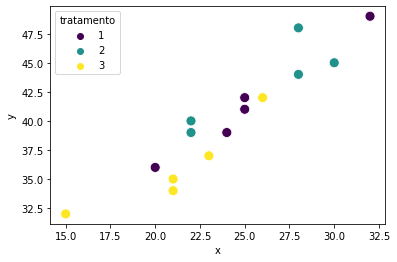

In [17]:
sns.scatterplot(data=df, x="x", y="y", hue="tratamento", palette = "viridis", s = 100)

## Gráfico Boxplot tratamento vs y

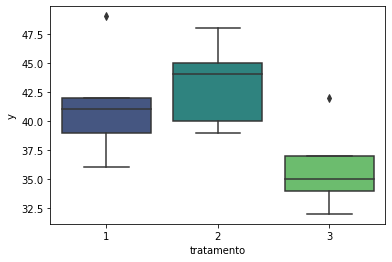

In [112]:
sns.boxplot(x="tratamento", y="y", palette = "viridis", data=df)

## Matriz de planejamento do modelo completo

In [79]:
X_plan = pd.DataFrame(data={ "1": pd.Series(np.zeros(len(df))).replace(0,1).astype(int),
                             "2": pd.Series(np.concatenate((pd.Series(np.zeros(5)).replace(0, 1), pd.Series(np.zeros(5)), pd.Series(np.zeros(5)).replace(0, -1)), axis = None)).astype(int),
                             "3": pd.Series(np.concatenate((pd.Series(np.zeros(5)),pd.Series(np.zeros(5)).replace(0, 1), pd.Series(np.zeros(5)).replace(0, -1)), axis = None)).astype(int),
                             "4":(df.x - df.x.mean())})
                         
X_plan = X_plan.to_numpy()
print("X_plan")
print(X_plan)
y_matrix = y.to_numpy().reshape((len(y), 1))
print("")
print("y_matrix")
print(y_matrix)

X_plan
[[ 1.          1.          0.         -4.13333333]
 [ 1.          1.          0.          0.86666667]
 [ 1.          1.          0.         -0.13333333]
 [ 1.          1.          0.          0.86666667]
 [ 1.          1.          0.          7.86666667]
 [ 1.          0.          1.         -2.13333333]
 [ 1.          0.          1.          3.86666667]
 [ 1.          0.          1.         -2.13333333]
 [ 1.          0.          1.          5.86666667]
 [ 1.          0.          1.          3.86666667]
 [ 1.         -1.         -1.         -3.13333333]
 [ 1.         -1.         -1.         -1.13333333]
 [ 1.         -1.         -1.          1.86666667]
 [ 1.         -1.         -1.         -3.13333333]
 [ 1.         -1.         -1.         -9.13333333]]

y_matrix
[[36]
 [41]
 [39]
 [42]
 [49]
 [40]
 [48]
 [39]
 [45]
 [44]
 [35]
 [37]
 [42]
 [34]
 [32]]


## Estimação dos parametros

In [85]:
# Existem três maneiras diferentes de se calcular produtos de matrizes
theta_c = np.dot(np.dot(np.linalg.inv(np.dot(X_plan.transpose(), X_plan)), X_plan.transpose()), y_matrix) # 1ª com o comando dot
theta_c = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_plan.transpose(), X_plan)), X_plan.transpose()), y_matrix) # 2ª com o comando matmult
theta_c = np.linalg.inv(X_plan.transpose() @ X_plan) @ X_plan.transpose() @ y_matrix # 3ª usando o "@" como operador de multiplicação matricial
print("theta_c")
print(theta_c)

print("")
print("Média de y")
print(y.mean())

theta_c
[[40.2       ]
 [ 0.18241309]
 [ 1.2192229 ]
 [ 0.95398773]]

Média de y
40.2


### Soma dos erros ao quadrado [Modelo completo]

In [97]:
pred_c = X_plan @ theta_c
SQE_c  = sum((y_matrix - pred_c)**2)
print("SQE")
print(SQE_c)

SQE
[27.98588957]


## Matriz de planejamento do modelo reduzido

In [99]:
X_plan_r = pd.DataFrame(data={ "1": pd.Series(np.zeros(len(df))).replace(0,1).astype(int),
                             "4":(df.x - df.x.mean())})
                         
X_plan_r = X_plan_r.to_numpy()
print("X_plan_r")
print(X_plan_r)

X_plan_r
[[ 1.         -4.13333333]
 [ 1.          0.86666667]
 [ 1.         -0.13333333]
 [ 1.          0.86666667]
 [ 1.          7.86666667]
 [ 1.         -2.13333333]
 [ 1.          3.86666667]
 [ 1.         -2.13333333]
 [ 1.          5.86666667]
 [ 1.          3.86666667]
 [ 1.         -3.13333333]
 [ 1.         -1.13333333]
 [ 1.          1.86666667]
 [ 1.         -3.13333333]
 [ 1.         -9.13333333]]


## Estimação dos parametros

In [100]:
theta_r = np.linalg.inv(X_plan_r.transpose() @ X_plan_r) @ X_plan_r.transpose() @ y_matrix 
print("theta_r")
print(theta_r)

print("")
print("Média de y")
print(y.mean())

theta_r
[[40.2       ]
 [ 1.07972491]]

Média de y
40.2


### Soma dos erros ao quadrado [Modelo reduzido]

In [101]:
pred_r = X_plan_r @ theta_r
SQE_r  = sum((y_matrix - pred_r)**2)
print("SQE")
print(SQE_r)

SQE
[41.26974019]


## Comparação dos SQE entre os dois modelos

In [102]:

print("SQE modelo reduzido = {}".format(SQE_r))
print("")
print("SQE modelo completo = {}".format(SQE_c))


SQE modelo reduzido = [41.26974019]

SQE modelo completo = [27.98588957]


>> Modelo completo traz menos redíduos que o reduzido

## Estatistica do teste

In [103]:
from scipy.stats import f

In [107]:
f_c = f.ppf(q=1-0.05, dfn=2, dfd=11)
f_r = f.ppf(q=1-0.05, dfn=2, dfd=13)

print("Estatistica F do modelo completo = {}".format(round(f_c,3)))
print("")
print("Estatistica F do modelo reduzudi = {}".format(round(f_r,3)))

Estatistica F do modelo completo = 3.982

Estatistica F do modelo reduzudi = 3.806
